# 🐾 Step 1: Setup & Data Exploration

In this notebook, we will:
1. Import TensorFlow and check our setup
2. Define the paths to our data
3. Count images in each class
4. Visualize some sample footprints

## 1.1 Import Libraries

In [1]:
# Core libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

# Check TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

# Check if GPU is available (optional, CPU works fine too)
print(f"GPU available: {tf.config.list_physical_devices('GPU')}")

TensorFlow version: 2.20.0
GPU available: []


## 1.2 Define Data Paths

Our data is organized in folders:
```
data/
├── train/
│   ├── domestic_cat/
│   ├── domestic_dog/
│   └── european_badger/
├── valid/
└── test/
```

In [2]:
# Define paths to our data folders
DATA_DIR = "../data"
TRAIN_DIR = os.path.join(DATA_DIR, "train")
VALID_DIR = os.path.join(DATA_DIR, "valid")
TEST_DIR = os.path.join(DATA_DIR, "test")

# Check the folders exist
print(f"Train folder exists: {os.path.exists(TRAIN_DIR)}")
print(f"Valid folder exists: {os.path.exists(VALID_DIR)}")
print(f"Test folder exists: {os.path.exists(TEST_DIR)}")

Train folder exists: True
Valid folder exists: True
Test folder exists: True


## 1.3 Count Images Per Class

Let's see how many images we have for each animal.

In [3]:
# Get class names (folder names)
class_names = os.listdir(TRAIN_DIR)
print(f"Classes: {class_names}")
print(f"Number of classes: {len(class_names)}")

Classes: ['domestic_cat', 'domestic_dog', 'european_badger']
Number of classes: 3


In [4]:
# Count images in each split
def count_images(directory):
    """Count images in each class folder."""
    counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            counts[class_name] = len(os.listdir(class_path))
    return counts

train_counts = count_images(TRAIN_DIR)
valid_counts = count_images(VALID_DIR)
test_counts = count_images(TEST_DIR)

print("Training set:")
for name, count in train_counts.items():
    print(f"  {name}: {count} images")
print(f"  Total: {sum(train_counts.values())} images")

print("\nValidation set:")
for name, count in valid_counts.items():
    print(f"  {name}: {count} images")
print(f"  Total: {sum(valid_counts.values())} images")

print("\nTest set:")
for name, count in test_counts.items():
    print(f"  {name}: {count} images")
print(f"  Total: {sum(test_counts.values())} images")

Training set:
  domestic_cat: 112 images
  domestic_dog: 34 images
  european_badger: 64 images
  Total: 210 images

Validation set:
  domestic_cat: 17 images
  domestic_dog: 5 images
  european_badger: 9 images
  Total: 31 images

Test set:
  domestic_cat: 35 images
  domestic_dog: 9 images
  european_badger: 17 images
  Total: 61 images


## 1.4 Visualize Sample Images

Let's see what the footprints look like!

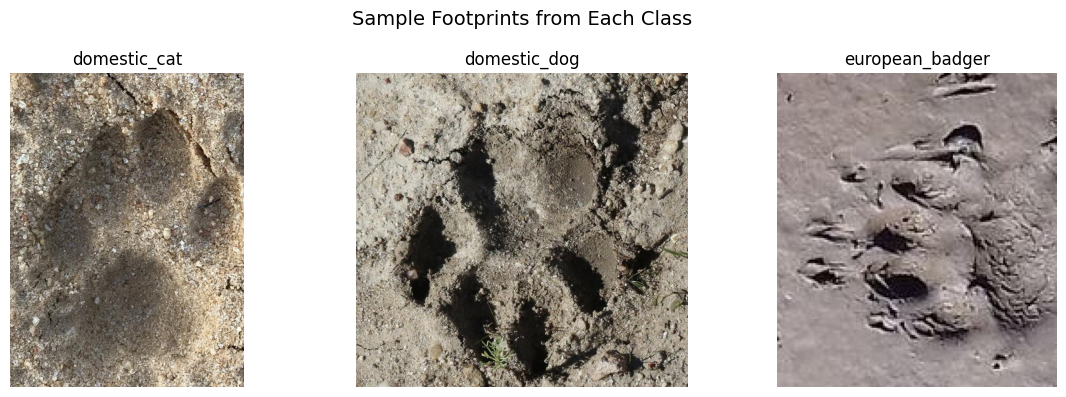

In [5]:
# Display one sample from each class
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, class_name in enumerate(class_names):
    # Get first image in the class folder
    class_path = os.path.join(TRAIN_DIR, class_name)
    image_name = os.listdir(class_path)[0]
    image_path = os.path.join(class_path, image_name)
    
    # Load and display image
    img = plt.imread(image_path)
    axes[i].imshow(img)
    axes[i].set_title(class_name)
    axes[i].axis('off')

plt.suptitle("Sample Footprints from Each Class", fontsize=14)
plt.tight_layout()
plt.show()

## ✅ Step 1 Complete!

**What we learned:**
- We have 3 classes: domestic_cat, domestic_dog, european_badger
- Our data is already split into train/valid/test folders
- TensorFlow is working

**Next step:** Create data loaders to feed images to our model.